In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
normal = pd.read_csv('../20250212/arrival_records_merge_normal_re.csv')
grandprix = pd.read_csv('../20250212/arrival_records_merge_grandprix_re.csv')

C:\Users\gennw\AppData\Local\Temp\ipykernel_2168\949270427.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  normal = pd.read_csv('../20250212/arrival_records_merge_normal_re.csv')
C:\Users\gennw\AppData\Local\Temp\ipykernel_2168\949270427.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  grandprix = pd.read_csv('../20250212/arrival_records_merge_grandprix_re.csv')


In [21]:
normal['hour'] = pd.to_datetime(normal['time']).dt.hour
grandprix['hour'] = pd.to_datetime(grandprix['time']).dt.hour

C:\Users\gennw\AppData\Local\Temp\ipykernel_2168\824387683.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  normal['hour'] = pd.to_datetime(normal['time']).dt.hour
C:\Users\gennw\AppData\Local\Temp\ipykernel_2168\824387683.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  grandprix['hour'] = pd.to_datetime(grandprix['time']).dt.hour


In [22]:
normal = normal[['route', 'hour', 'weekday', 'passengerFlow', 'trafficCondition', 'arrivalDuration']]
grandprix = grandprix[['route', 'hour', 'weekday', 'passengerFlow', 'trafficCondition', 'arrivalDuration']]
normal['route'] = normal['route'].astype(str)
grandprix['route'] = grandprix['route'].astype(str)

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(normal['route'].unique())
normal['route'] = encoder.transform(normal['route'])
grandprix['route'] = encoder.transform(grandprix['route'])

In [26]:
corr_matrix_normal = normal.corr()
corr_matrix_grandprix = grandprix.corr()
mask_normal = np.triu(np.ones_like(corr_matrix_normal, dtype=bool))
mask_grandprix = np.triu(np.ones_like(corr_matrix_grandprix, dtype=bool))

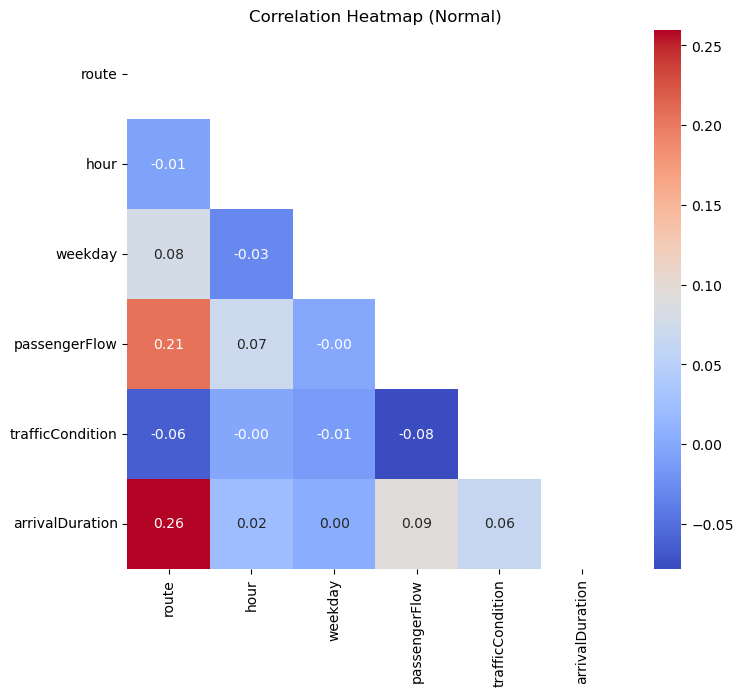

In [32]:
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix_normal, annot=True, cmap='coolwarm', fmt='.2f', mask=mask_normal)
plt.title('Correlation Heatmap (Normal)')
plt.show()

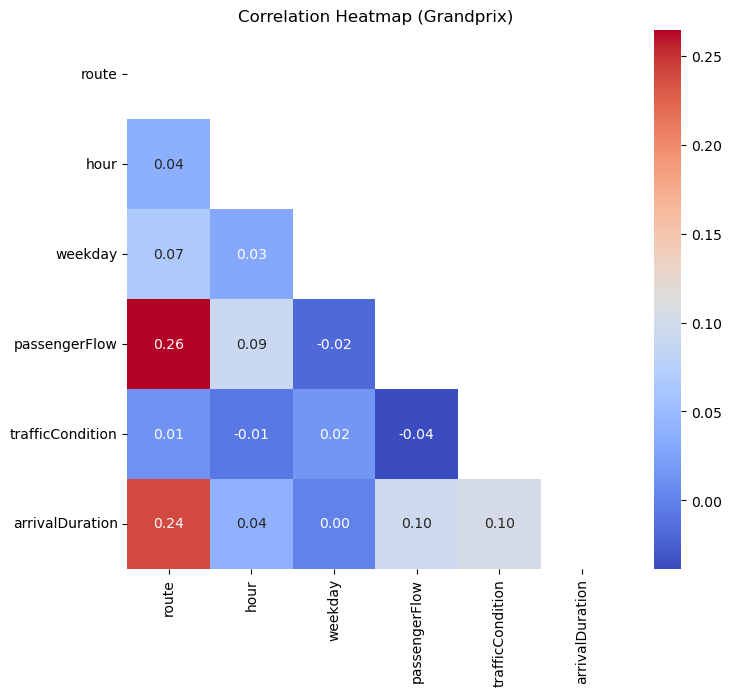

In [33]:
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix_grandprix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask_grandprix)
plt.title('Correlation Heatmap (Grandprix)')
plt.show()